In [1]:
import sys
sys.path.append('../')
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)

In [2]:
ibex = yf.Ticker("^IBEX")

# get historical market data
data = ibex.history(period="max")

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-07-12,2826.797119,2826.797119,2814.597180,2826.396973,0,0,0
1993-07-13,2826.396990,2843.697021,2820.896996,2843.396973,0,0,0
1993-07-14,2845.396979,2858.396965,2845.396979,2851.097168,0,0,0
1993-07-15,2848.697016,2848.697016,2834.997079,2843.697021,0,0,0
1993-07-16,2843.697008,2847.997052,2818.797131,2830.497070,0,0,0


In [3]:
data = data[['Close']]
data.tail()

,Close
Date,
2022-10-04,7696.600098
2022-10-05,7579.899902
2022-10-06,7511.100098
2022-10-07,7436.899902
2022-10-10,7414.600098


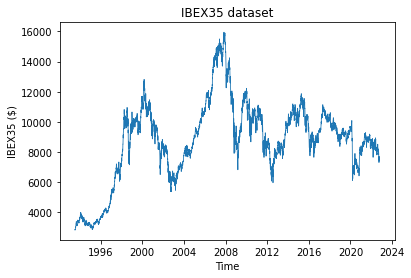

In [4]:
a = plt.plot(data, linewidth=0.8, alpha=1)
a = plt.xlabel('Time')
a= plt.ylabel('IBEX35 ($)')
a = plt.title('IBEX35 dataset')
resolution_value = 600
plt.savefig("IBEX35.png", format="png", dpi=resolution_value)

In [5]:
data.index = pd.DatetimeIndex(data.index)

In [6]:
data_test = data[pd.DatetimeIndex(data.index).year >= 2015]
data_test = data[pd.DatetimeIndex(data.index).year >= 2]
data_train = data[pd.DatetimeIndex(data.index).year < 2015]

In [7]:
pre_train = torch.tensor(np.array(data_train[['Close']])).unsqueeze(0)
pre_test = torch.tensor(np.array(data_test[['Close']])).unsqueeze(0)

In [8]:
n_x, n_y = 30, 15
train = []
for i in range(0, pre_train.shape[1]-n_x-n_y):
    try:
        train.append(torch.tensor(pre_train[:, i:(i+n_x+n_y), :]))
    except:
        pass

train = torch.cat(train, dim=0)

test = []
for i in range(0, pre_test.shape[1]-n_x-n_y):
    try:
        test.append(torch.tensor(pre_test[:, i:(i+n_x+n_y), :]))
    except:
        pass

test = torch.cat(test, dim=0)

C:\Users\pere9\AppData\Local\Temp\ipykernel_18028\2442606705.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train.append(torch.tensor(pre_train[:, i:(i+n_x+n_y), :]))
C:\Users\pere9\AppData\Local\Temp\ipykernel_18028\2442606705.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test.append(torch.tensor(pre_test[:, i:(i+n_x+n_y), :]))


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, val = train_test_split(train, test_size=0.20, random_state=42)

In [11]:
train.shape, val.shape, test.shape

(torch.Size([4296, 45, 1]),
 torch.Size([1074, 45, 1]),
 torch.Size([7359, 45, 1]))

In [12]:
data = {}

In [13]:
data['X_train'], data['Y_train'] = train[:, :n_x, :].float(), train[:, (n_x-1):, :1].float()
data['X_val'], data['Y_val'] = val[:, :n_x, :].float(), val[:, (n_x-1):, :1].float()
data['X_test'], data['Y_test'] = test[:, :n_x, :].float(), test[:, (n_x-1):, :1].float()

In [14]:
data['X_train'] = torch.cat([torch.arange(0, data['X_train'].shape[1]).repeat(
    data['X_train'].shape[0], 1).unsqueeze(2), data['X_train']], dim=2)

data['Y_train'] = torch.cat([torch.arange(0, data['Y_train'].shape[1]).repeat(
    data['Y_train'].shape[0], 1).unsqueeze(2), data['Y_train']], dim=2)

data['X_val'] = torch.cat([torch.arange(0, data['X_val'].shape[1]).repeat(
    data['X_val'].shape[0], 1).unsqueeze(2), data['X_val']], dim=2)

data['Y_val'] = torch.cat([torch.arange(0, data['Y_val'].shape[1]).repeat(
    data['Y_val'].shape[0], 1).unsqueeze(2), data['Y_val']], dim=2)

data['X_test'] = torch.cat([torch.arange(0, data['X_test'].shape[1]).repeat(
    data['X_test'].shape[0], 1).unsqueeze(2), data['X_test']], dim=2)

data['Y_test'] = torch.cat([torch.arange(0, data['Y_test'].shape[1]).repeat(
    data['Y_test'].shape[0], 1).unsqueeze(2), data['Y_test']], dim=2)

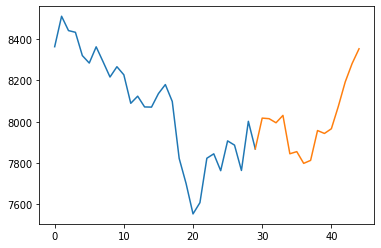

In [15]:
plt.plot(data['X_train'][0, :, 1])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][0, :, 1])

In [16]:
# We normalize the data
mean, std = data['X_train'][:, :, 1].mean(), data['X_train'][:, :, 1].std()

for dataset in data:
    data[dataset][:, :, 1] = (data[dataset][:, :, 1]-mean)/std

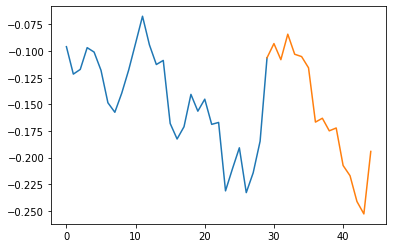

In [17]:
i=100
plt.plot(data['X_train'][i, :, 1])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][i, :, 1])

In [18]:
stats = {'mean': mean, 'std': std}

In [19]:
torch.save(stats, 'stats_data.pt')

In [20]:
torch.save(data, 'data.pt')

### Some data analysis

In [21]:
stats_data = torch.load('stats_data.pt')

In [22]:
stats_data

{'mean': tensor(8674.5107), 'std': tensor(3020.3215)}

In [23]:
x = data['X_train'][:, -1:, 1:]*stats_data['std']+stats_data['mean']
y = data['Y_train'][:, 1:, 1:]*stats_data['std']+stats_data['mean']

In [24]:
inc = torch.ones(y.shape)*x
inc_ = (y-inc)/inc
inc_max = torch.max(inc_, dim=1)[0].squeeze(1)

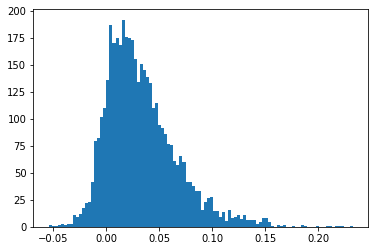

In [25]:
a = plt.hist(inc_max.numpy(), bins=100)

In [26]:
np.quantile(inc_max, 0.95)

0.09710417501628399

In [27]:
inc_min = torch.min(inc_, dim=1)[0].squeeze(1)

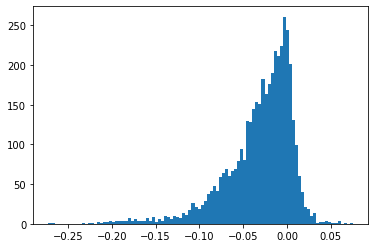

In [28]:
a = plt.hist(inc_min.numpy(), bins=100)

In [29]:
np.quantile(inc_min, 0.05)

-0.10442594811320305